In [89]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1998)

In [90]:
train = pd.read_csv('en.csv')

In [3]:
train.head()

,Unnamed: 0,status_id,status,gender,age
0,0,10571867266,"Come to ""Algo Más Inesperado Que La Muerte"" We...",FEMALE,50-64
1,1,10623442379,Los Patriotas http://fb.me/KueLf3Gl7,FEMALE,50-64
2,2,10675874462,http://www.facebook.com/photo.php?pid=3505512&...,FEMALE,50-64
3,3,11039655976,"I posted 2 photos on Facebook in the album ""Mi...",FEMALE,50-64
4,4,11197684619,Por Mi Culpa http://fb.me/tE5vwZsG,FEMALE,50-64


In [4]:
train.describe()

,Unnamed: 0,status_id,status,gender,age
count,5003,5003,5003,4997,4997
unique,5002,3561,3510,2,4
top,http://t.co/deUrEzBz,FEMALE,testing posting to individual accounts,MALE,35-49
freq,2,3,10,2500,3386


In [6]:
train.isnull().count()

Unnamed: 0    5003
status_id     5003
status        5003
gender        5003
age           5003
dtype: int64

In [35]:
train.gender.value_counts()

MALE      2500
FEMALE    2497
Name: gender, dtype: int64

In [60]:
nan=0
for i,k in enumerate(train.gender):
    if (k != 'MALE' and k != 'FEMALE'):
        print(i)
        nan+=1
print(nan)


2971
2972
3348
3349
3758
3759
6


In [67]:
for i,k in enumerate(train.gender):
    if (k != 'MALE' and k != 'FEMALE'):
        train=train.drop(train.index[i])

In [71]:
train.shape

(4997, 5)

In [73]:
train.gender.value_counts()

MALE      2500
FEMALE    2492
Name: gender, dtype: int64

In [91]:
train_aja = train.drop(['Unnamed: 0','status_id','age'], axis = 1)

In [76]:
train_aja.head()

,status,gender
0,"Come to ""Algo Más Inesperado Que La Muerte"" We...",FEMALE
1,Los Patriotas http://fb.me/KueLf3Gl7,FEMALE
2,http://www.facebook.com/photo.php?pid=3505512&...,FEMALE
3,"I posted 2 photos on Facebook in the album ""Mi...",FEMALE
4,Por Mi Culpa http://fb.me/tE5vwZsG,FEMALE


In [86]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
stop_words = set(stopwords.words('english')) 

In [95]:
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    filtered_words = [w for w in words if not w in stop_words] 
    return (" ".join(filtered_words)).strip()

In [96]:
%%time
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(len(train_aja)):
    clean_tweet_texts.append(tweet_cleaner(train_aja['status'][i]))
print("Done!")

Cleaning and parsing the tweets...



C:\Users\user\Anaconda2\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://www.facebook.com/photo.php?pid=3505512&l=465638bc2e&id=43000311091" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\user\Anaconda2\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://www.facebook.com/photo.php?pid=3892397&l=7816a1ce44&id=43000311091" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\user\Anaconda2\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://tinyurl.com/ma76zx" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests

Done!
Wall time: 2.69 s


C:\Users\user\Anaconda2\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://www.facebook.com/photo.php?pid=210061&l=1710e9d3d3&id=128476260507099" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\user\Anaconda2\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://www.facebook.com/photo.php?pid=210128&l=06d6cfb8f8&id=128476260507099" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\user\Anaconda2\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://www.facebook.com/photo.php?pid=210129&l=5b87c752e8&id=128476260507099" looks like a URL. Beautiful Soup is not an HTTP cli

In [98]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['status'])
clean_df['gender'] = train_aja.gender
clean_df.head(10)

,status,gender
0,come algo inesperado que la muerte wednesday m...,FEMALE
1,los patriotas,FEMALE
2,pid l bc e id,FEMALE
3,posted photos facebook album mi lbum iii,FEMALE
4,por mi culpa,FEMALE
5,hacer sangre,FEMALE
6,mi vida en dos patadas,FEMALE
7,partidismo,FEMALE
8,viajando con elvira lindo,FEMALE
9,p caro gordo,FEMALE


In [100]:
train_aja.head(10)

,status,gender
0,"Come to ""Algo Más Inesperado Que La Muerte"" We...",FEMALE
1,Los Patriotas http://fb.me/KueLf3Gl7,FEMALE
2,http://www.facebook.com/photo.php?pid=3505512&...,FEMALE
3,"I posted 2 photos on Facebook in the album ""Mi...",FEMALE
4,Por Mi Culpa http://fb.me/tE5vwZsG,FEMALE
5,Hacer Sangre http://fb.me/uCoUvfG9,FEMALE
6,"Mi vida, en dos patadas http://fb.me/wykhb3oR",FEMALE
7,Partidismo http://fb.me/wIpbkuaU,FEMALE
8,Viajando Con Elvira Lindo http://fb.me/sFPyDLwD,FEMALE
9,Pícaro gordo http://fb.me/yBYhrXJ2,FEMALE


In [101]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')

In [109]:
clean_train = pd.read_csv('clean_tweet.csv')
clean_train = clean_train.drop('Unnamed: 0', axis = 1)
clean_train.head()

,status,gender
0,come algo inesperado que la muerte wednesday m...,FEMALE
1,los patriotas,FEMALE
2,pid l bc e id,FEMALE
3,posted photos facebook album mi lbum iii,FEMALE
4,por mi culpa,FEMALE


In [130]:
clean_train.status.isnull().sum()

24

In [133]:
clean_train = clean_train.dropna()

In [134]:
clean_train.shape

(4976, 2)

Text(0.5,1,'Female VS Male')

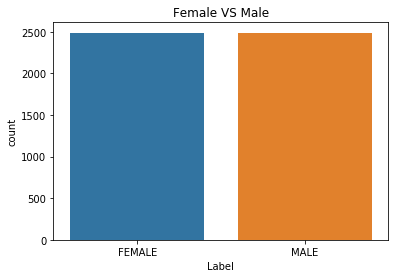

In [190]:
sns.countplot(clean_train.gender)
plt.xlabel('Label')
plt.title('Female VS Male')

In [224]:
test = pd.read_csv('test.csv')
test.head()

,Unnamed: 0,status_id,status,gender,age
0,0,383ff14ecc58064f34b7bb8a586497c2,remembering noah holding jack down on the roof...,FEMALE,35-49
1,1,6561dd1af8af4f0d95c714967c986ee4,going 2 portland - about 2 takeoff,FEMALE,35-49
2,2,90fb5b419b4b670027af0ae8b9b28ac9,"&lt;a href=""http://bizstone.com""&gt;announcing...",FEMALE,35-49
3,3,737e74f04566dcae3e8ba67f9e76b710,In a conf at google. Fun,FEMALE,35-49
4,4,1622dae3a77eaea3df5e0a261fea4fe8,almost got arrested by homeland security,FEMALE,35-49


Cleaning and parsing the tweets...

Done!
Wall time: 371 ms


In [226]:
clean_test = pd.DataFrame(clean_tweet_texts,columns=['status'])
clean_test['gender'] = kunci
clean_test.head(10)
X_test = clean_test['status']
kunci = test['gender']

In [227]:
%%time
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(len(X_test)):
    clean_tweet_texts.append(tweet_cleaner(X_test[i]))
print("Done!")

Cleaning and parsing the tweets...

Done!
Wall time: 131 ms


In [229]:
print(X_test.shape)
len(kunci)

(272,)


272

In [135]:
from sklearn import preprocessing
tweet_text_training = clean_train['status']
target_training = clean_train['gender']
X_training = tweet_text_training[pd.notnull(tweet_text_training)]
Y_training = target_training[pd.notnull(tweet_text_training)]

In [136]:
from sklearn.model_selection import train_test_split
X_train_part1, X_train_part2, Y_train_part1, Y_train_part2 = train_test_split(X_training, Y_training, train_size=0.01, random_state=42)

C:\Users\user\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [230]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_training_vector = vectorizer.fit_transform(X_train_part1)
print("Number of features:  %d" % len(vectorizer.vocabulary_))
X_test_vector = vectorizer.transform(X_test)

Number of features:  358


In [223]:
from sklearn.feature_selection import SelectKBest, chi2

vectorizer = CountVectorizer()
X_training_vector = vectorizer.fit_transform(X_train_part1)
print("Number of features:  %d" % len(vectorizer.vocabulary_))
print ("---------------------")
X_test_vector = vectorizer.transform(X_test)

#print features their chi2 score
feature_scores = chi2(X_training_vector, Y_train_part1)[0]
for score, fname in sorted(zip(feature_scores, vectorizer.get_feature_names()), reverse=True)[:10]:
    print(fname, score)

#selectKBest feature using Chi2 and see whether it could improve the accuracy
ch2 = SelectKBest(chi2, k=358)
X_train_best = ch2.fit_transform(X_training_vector, Y_train_part1)
X_test_best = ch2.transform(X_test_vector)
print ("---------------------")
print("Training Classifier...")
clf.fit(X_train_best, Y_train_part1)
print("Predicting...")
prediction = clf.predict(X_test_best)
accuracy = accuracy_score(kunci, prediction)
print ('Accuracy:', accuracy)

Number of features:  358
---------------------
travel 9.333333333333332
asia 8.000000000000002
lp 5.333333333333333
wire 4.000000000000001
via 4.000000000000001
great 4.000000000000001
booksforall 4.000000000000001
fabrik 3.750000000000001
week 2.6666666666666665
us 2.6666666666666665
---------------------
Training Classifier...
Predicting...
Accuracy: 0.7201136594276436


In [143]:
from sklearn import svm
from sklearn.metrics import accuracy_score
clf = svm.SVC(kernel='linear')
print("Training Classifier...")
clf.fit(X_training_vector, Y_train_part1)
print("Predicting...")
prediction = clf.predict(X_test_vector)
accuracy = accuracy_score(kunci, prediction)
print ('Accuracy:', accuracy)

Training Classifier...
Predicting...
Accuracy: 0.7201136594276436


In [151]:
clf = AdaBoostClassifier()
print("Training Classifier...")
clf.fit(X_training_vector, Y_train_part1)
print("Predicting...")
prediction = clf.predict(X_test_vector)
accuracy = accuracy_score(kunci, prediction)
print ('Accuracy:', accuracy)

Training Classifier...
Predicting...
Accuracy: 0.6482646640957986


In [234]:
clf = RandomForestClassifier()
print("Training Classifier...")
clf.fit(X_training_vector, Y_train_part1)
print("Predicting...")
prediction = clf.predict(X_test_vector)
accuracy = accuracy_score(kunci, prediction)
print ('Accuracy:', accuracy)

Training Classifier...
Predicting...
Accuracy: 0.5110294117647058


In [153]:
clf = MLPClassifier(alpha=1)
print("Training Classifier...")
clf.fit(X_training_vector, Y_train_part1)
print("Predicting...")
prediction = clf.predict(X_test_vector)
accuracy = accuracy_score(kunci, prediction)
print ('Accuracy:', accuracy)

Training Classifier...
Predicting...
Accuracy: 0.6983965902171707


C:\Users\user\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [159]:
clf =  svm.SVC(kernel="linear", C=0.025)
print("Training Classifier...")
clf.fit(X_training_vector, Y_train_part1)
print("Predicting...")
prediction = clf.predict(X_test_vector)
accuracy = accuracy_score(kunci, prediction)
print ('Accuracy:', accuracy)

Training Classifier...
Predicting...
Accuracy: 0.5088289019687436


In [237]:
from sklearn import tree
clf =  tree.DecisionTreeClassifier()
print("Training Classifier...")
clf.fit(X_training_vector, Y_train_part1)
print("Predicting...")
prediction = clf.predict(X_test_vector)
accuracy = accuracy_score(kunci, prediction)
print ('Accuracy:', accuracy)

Training Classifier...
Predicting...
Accuracy: 0.5147058823529411


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [184]:
def RNN():
    inputs = Input(name='inputs',shape=[358])
    layer = Embedding(358,50,input_length=358)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [185]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 358)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 358, 50)           17900     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [186]:
model.fit(X_training_vector, Y_train_part1,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 39 samples, validate on 10 samples
Epoch 1/10


InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

In [218]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
cm = confusion_matrix(kunci, prediction)

In [219]:
cm

array([[  1, 135],
       [  1, 135]], dtype=int64)

In [221]:
cm_df = pd.DataFrame(cm)

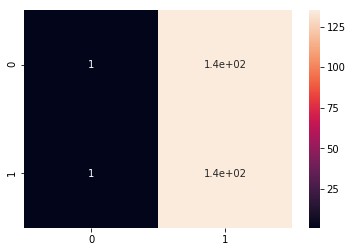

In [222]:
sns.heatmap(cm_df, annot=True)